In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
links = pd.read_csv('ml-latest-small/links.csv', header = 0)
print(links.shape)
links.head(5)

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [58]:
movies = pd.read_csv('ml-latest-small/movies.csv', header = 0)
print(movies.shape)
print(movies['movieId'].nunique())
movies.head(5)

(9742, 3)
9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
ratings = pd.read_csv('ml-latest-small/ratings.csv', header = 0, 
                      usecols = ['userId', 'movieId', 'rating'])
print(ratings.shape)
print(ratings['userId'].nunique())
ratings.head(5)

(100836, 3)
610


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [60]:
tags = pd.read_csv('ml-latest-small/tags.csv', header = 0, 
                   usecols = ['userId', 'movieId', 'tag'])
print(tags.shape)
print(tags['userId'].nunique())
tags.head(5) 

(3683, 3)
58


,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


### Ratings

In [61]:
print(ratings['rating'].describe())
print(ratings['rating'].isnull().sum())
print(ratings['rating'].unique())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
0
[4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


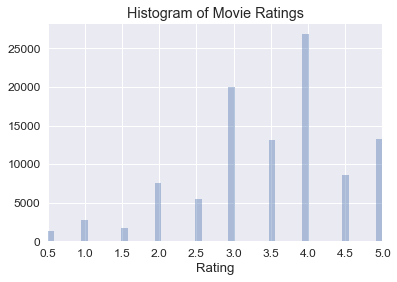

In [62]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
%matplotlib inline

# distribution of ratings
sns.distplot(a = ratings['rating'], kde = False)
plt.title('Histogram of Movie Ratings')
plt.xlabel('Rating')
plt.axis(xmin = 0.5, xmax = 5)

plt.savefig('hist.png')

### Merge DataFrames 
##### Find top-rated movies based on the average user ratings

In [63]:
df = pd.merge(movies, ratings, on = 'movieId')
print(df.shape)
df.head(5)

(100836, 5)


,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [64]:
## top-rated movies based on the average user ratings 
avg_rating = df.groupby('movieId')['rating'].agg('mean').sort_values(ascending = False)
top_movies = avg_rating[avg_rating == 5.0]
print(len(top_movies))

296


296 movies in the dataset have an average rating of 5.

In [65]:
top_296 = movies.loc[movies['movieId'].isin(top_movies.index)]
top_296.head(10)

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
121,148,"Awfully Big Adventure, An (1995)",Drama
405,467,Live Nude Girls (1995),Comedy
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama
433,496,What Happened Was... (1994),Comedy|Drama|Romance|Thriller
531,626,"Thin Line Between Love and Hate, A (1996)",Comedy
536,633,Denise Calls Up (1995),Comedy
666,876,Supercop 2 (Project S) (Chao ji ji hua) (1993),Action|Comedy|Crime|Thriller
865,1140,Entertaining Angels: The Dorothy Day Story (1996),Drama


In [66]:
top_296.loc[top_296['genres'] == 'Horror']

,movieId,title,genres
1037,1349,Vampire in Venice (Nosferatu a Venezia) (Nosfe...,Horror
2936,3939,Slumber Party Massacre II (1987),Horror
2937,3940,Slumber Party Massacre III (1990),Horror
2938,3941,Sorority House Massacre (1986),Horror
2939,3942,Sorority House Massacre II (1990),Horror
8958,136834,The Eye: Infinity (2005),Horror


In [67]:
top_296.loc[top_296['genres'] == 'Documentary']

,movieId,title,genres
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
1006,1310,Hype! (1996),Documentary
2480,3303,Black Tar Heroin: The Dark End of the Street (...,Documentary
3672,5059,Little Dieter Needs to Fly (1997),Documentary
4768,7096,Rivers and Tides (2001),Documentary
5497,26366,Harlan County U.S.A. (1976),Documentary
6189,44943,9/11 (2002),Documentary
7521,84273,Zeitgeist: Moving Forward (2011),Documentary
7581,86237,Connections (1978),Documentary
7600,86668,Louis Theroux: Law & Disorder (2008),Documentary


#### Q: How to find top-rated movies with multiple genres?

### Genres

- pipe-separated
- How many unique genres are there?
- What are the most popular genres?
- Visualization: word cloud

In [68]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

genre_labels

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [69]:
## Initialize the count dictionary
genre_counts = {}
for label in genre_labels:
    genre_counts[label] = 0

for ls in movies['genres'].str.split('|').values:
    for g in ls:
        genre_counts[g] += 1

genre_counts

{'(no genres listed)': 34,
 'Fantasy': 779,
 'IMAX': 158,
 'Adventure': 1263,
 'Mystery': 573,
 'Thriller': 1894,
 'Documentary': 440,
 'Horror': 978,
 'Crime': 1199,
 'Children': 664,
 'Romance': 1596,
 'Drama': 4361,
 'Musical': 334,
 'Western': 167,
 'Sci-Fi': 980,
 'Animation': 611,
 'Action': 1828,
 'Film-Noir': 87,
 'War': 382,
 'Comedy': 3756}

[Reference(for sorting a dictionary by value)](https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value)

In [70]:
for g in sorted(genre_counts, key = genre_counts.get, reverse = True):
    print(g, genre_counts[g])

Drama 4361
Comedy 3756
Thriller 1894
Action 1828
Romance 1596
Adventure 1263
Crime 1199
Sci-Fi 980
Horror 978
Fantasy 779
Children 664
Animation 611
Mystery 573
Documentary 440
War 382
Musical 334
Western 167
IMAX 158
Film-Noir 87
(no genres listed) 34


### The most popular genres are Drama, Comedy, Thriller, Action, and Romance.

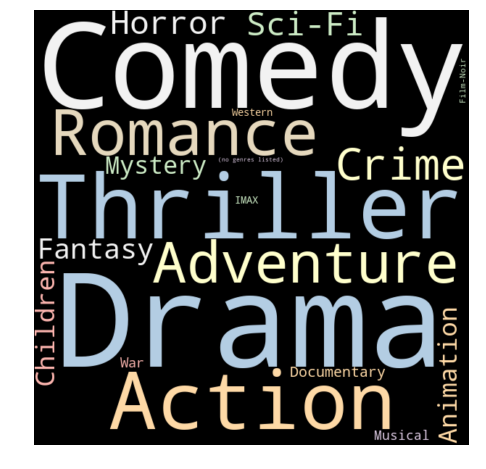

In [71]:
## Visualization 
## (check colormap)
import wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 600, colormap = 'Pastel1').generate_from_frequencies(genre_counts)
f, ax = plt.subplots(figsize = (8, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('genre_wordcloud.png')

### Simple Recommender

- generalized recommendations (no personalized recommendations based on the user)
- sort by the average user ratings
- minimum number of user ratings required

In [72]:
## to be implemented

### Content-based Recommender

- genre-based

In [73]:
movies['genres'] = movies['genres'].str.split('|').values

print(movies['genres'][0]) # a list of strings
print(' '.join(movies['genres'][0]))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
Adventure Animation Children Comedy Fantasy


In [74]:
def transform_genre(ls_genre):
    return ' '.join(ls_genre)

In [75]:
movies['genres'] = movies['genres'].apply(transform_genre)
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2))
tfidf_matrix = tfidf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 179)

In [77]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31379419, 0.0611029 , 0.05271111],
       [0.31379419, 1.        , 0.        , 0.        ],
       [0.0611029 , 0.        , 1.        , 0.35172407],
       [0.05271111, 0.        , 0.35172407, 1.        ]])

In [78]:
titles = movies['title']
indices = pd.Series(movies.index, index = movies['title'])
indices[:10]

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
Heat (1995)                           5
Sabrina (1995)                        6
Tom and Huck (1995)                   7
Sudden Death (1995)                   8
GoldenEye (1995)                      9
dtype: int64

In [79]:
def genre_recommendations(title, num):
    '''Returns movie recommendations based on the cosine similarity score 
       of the movie genre; the number of recommendations returned is specified by the user.'''
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    # start from 1 rather than 0 since the best score is always from the given movie itself
    sim_scores = sim_scores[1:num+1]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [80]:
genre_recommendations('Toy Story (1995)', 10)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object

In [81]:
genre_recommendations('Sudden Death (1995)', 10)

63                                       Fair Game (1995)
172                  Under Siege 2: Dark Territory (1995)
215                                    Hunted, The (1995)
555     Bloodsport 2 (a.k.a. Bloodsport II: The Next K...
876            Best of the Best 3: No Turning Back (1995)
1143                                   Double Team (1997)
1201                                         Steel (1997)
1647                                     Knock Off (1998)
1910                                     Avalanche (1978)
2120                          Aces: Iron Eagle III (1992)
Name: title, dtype: object

### Memory-based Recommender